In [1]:
import numpy as np
import pandas  as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
from scipy import linalg
from math import sqrt

In [2]:
client1 =np.load("client1.npz")
client2 =np.load("client2.npz")
client3 =np.load("client3.npz")
client2.files

['X_a2_sc', 'y_a2']

In [3]:
X_a1_t,X_a1_s,y_a1_t,y_a1_s  = client1["X_a1_sc"][:100],client1["X_a1_sc"][100:],client1["y_a1"][:100],client1["y_a1"][100:]
X_a2_t,X_a2_s,y_a2_t,y_a2_s  = client2["X_a2_sc"][:1000],client2["X_a2_sc"][1000:],client2["y_a2"][:1000],client2["y_a2"][1000:]
X_a3_t, X_a3_s, y_a3_t, y_a3_s = client3["X_a3_sc"][:10000],client3["X_a3_sc"][10000:],client3["y_a3"][:10000],client3["y_a3"][10000:]
                                                  
X_a1_t.shape, y_a1_s.shape,X_a2_t.shape,y_a2_s.shape,X_a3_t.shape, X_a3_s.shape

((100, 8), (312,), (1000, 8), (4080,), (10000, 8), (5148, 8))

In [4]:
# l is Number of hidden neurons
    
def ELM_L2(l, X_train, X_test, y_train, y_test, alpha = 1e-5):
    
    # Generate random input-to-hidden weights and bias
    n = X_train.shape[1]
    w = np.random.randn(n, l)
    b = np.random.randn(1, l)
    
    
    # Compute the hidden layer output 
    H = np.tanh(np.dot(X_train, w) + b)  # Apply activation function (tanh)
    
    # Calculate the output weights using the Moore-Penrose pseudoinverse
    B = np.dot(linalg.pinv(H.T.dot(H) + alpha *np. eye(l)), H.T.dot(y_train)) #output_weights
    

    # Calculate the predicted output on the training set
    pred_train = np.dot(H, B)

    # Calculate the predicted output on the testing set
    H_test = np.tanh(np.dot(X_test, w) + b)
    pred_test = np.dot(H_test, B)

    # Calculate the mean squared error on the training and testing sets
    rmse_train = sqrt(mean_squared_error(y_train, pred_train))
    rmse_test = sqrt(mean_squared_error(y_test, pred_test))
    r2 = r2_score(y_test, pred_test)
    

    return r2, rmse_test ,w ,B , b  


The root mean square error (RMSE) measures the average difference between a statistical model's predicted values and the actual values. Mathematically, it is the standard deviation of the residuals. Residuals represent the distance between the regression line and the data points.

In [23]:
c1_par_L2= np.load("client1_par_L2.npz") #neurons and alpha
c2_par_L2= np.load("client2_par_L2.npz") #neurons and alpha
c3_par_L2= np.load("client3_par_L2.npz") #neurons and alpha

In [10]:
c1_par_L2.files

['w', 'B', 'b', 'n_nuerons', 'reg_cof']

In [11]:
# Print the accuracies for different training data sizes
def acc_test_L2(X, y, X_test, y_test,l=10,alpha=1e-2,start=10,ranges=10):
    accuracies = {}
    accuracies_r2 = {}
    for size in range(start, len(X)+1, ranges):
        r2,rmse,_,_,_=ELM_L2(l, X[:size], X_test, y[:size], y_test, alpha)
        accuracies_r2[size] = r2
        accuracies[size]=rmse
    return accuracies, accuracies_r2


# Print the accuracies for different training data sizes
def acc_test_bias(X,y,l=10,start=10, ranges=10):
    accuracies = {}
    accuracies_r2 = {}
    for size in range(start, len(X), ranges):
        r2,rmse,_,_,_=ELM_bias(l, X[:size],X[size:],y[:size],y[size:])
        accuracies_r2[size] = r2
        accuracies[size]=rmse
    return accuracies, accuracies_r2

For client 1

In [24]:
l_L2= int(c1_par_L2["n_nuerons"]) # l is Number of hidden neurons
alpha_L2= float(c1_par_L2["reg_cof"])
l_L2, alpha_L2, 

(20, 0.001)

In [25]:
c1_err_t_L2, c1_r2_L2 = acc_test_L2(X_a1_t, y_a1_t, X_a1_s, y_a1_s, l=l_L2,alpha=alpha_L2,start=10, ranges=10)


In [15]:
c1_k_r2_L2=list(c1_r2_L2.keys())
c1_v_r2_L2=list(c1_r2_L2.values())

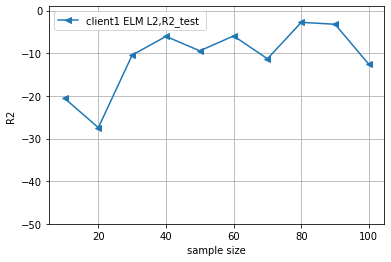

In [16]:
plt.plot(c1_k_r2_L2,c1_v_r2_L2, label="client1 ELM L2,R2_test ",marker='<')
#plt.plot(c1_k_r2_bias,c1_v_r2_bias, label="client1 ELM bias,R2_tes ",marker='<')
plt.grid("major")
plt.ylim(-50, 1)
plt.xlabel("sample size")
plt.ylabel("R2 ")
#plt.gca().invert_xaxis()
plt.legend()
plt.show()

plt.plot(c1_k_r2_bias,c1_v_r2_bias, label="client1 ELM bias,R2_tes ",marker='<')
plt.xlabel("sample size")
plt.ylabel("root mean square error ")
plt.ylim(-10, 1)
#plt.gca().invert_xaxis()
plt.legend()

For client2

In [26]:
c2_l_L2= int(c2_par_L2["n_nuerons"]) # l is Number of hidden neurons
c2_alpha_L2= float(c2_par_L2["reg_cof"])


In [27]:
c2_err_t_L2, c2_r2_L2 = acc_test_L2(X_a2_t, y_a2_t, X_a2_s, y_a2_s, l=c2_l_L2,alpha=alpha_L2,start=100, ranges=100)


In [20]:
c2_k_r2_L2=list(c2_r2_L2.keys())
c2_v_r2_L2=list(c2_r2_L2.values())

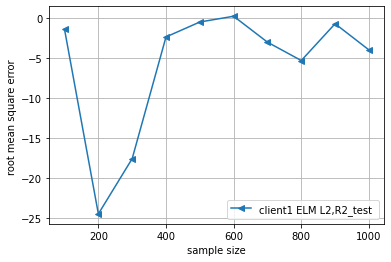

In [28]:

plt.plot(c2_k_r2_L2,c2_v_r2_L2, label="client1 ELM L2,R2_test ",marker='<')
plt.xlabel("sample size")
plt.grid("major")
# plt.ylim(-50, 1)
plt.ylabel("root mean square error ")
#plt.gca().invert_xaxis()
plt.legend()

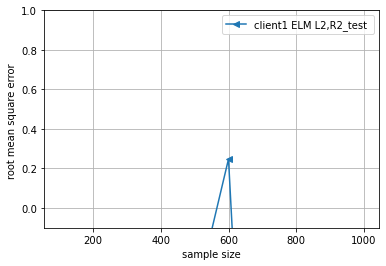

In [29]:
plt.plot(c2_k_r2_L2,c2_v_r2_L2, label="client1 ELM L2,R2_test ",marker='<')
plt.xlabel("sample size")
plt.grid("major")
plt.ylim(-0.1, 1)
plt.ylabel("root mean square error ")
#plt.gca().invert_xaxis()
plt.legend()

For client3

In [30]:
c3_l_L2= int(c3_par_L2["n_nuerons"]) # l is Number of hidden neurons
c3_alpha_L2= float(c3_par_L2["reg_cof"])


In [31]:
c3_err_t_L2, c3_r2_L2 = acc_test_L2(X_a3_t, y_a3_t, X_a3_s, y_a3_s, l=c3_l_L2,alpha=alpha_L2, start=100, ranges=100)


In [33]:
c3_k_r2_L2=list(c3_r2_L2.keys())
c3_v_r2_L2=list(c3_r2_L2.values())

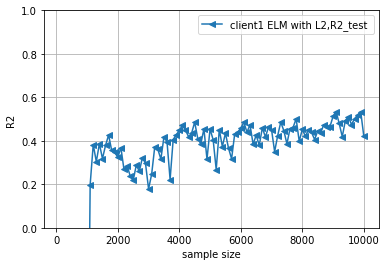

In [35]:

plt.plot(c3_k_r2_L2,c3_v_r2_L2, label="client1 ELM with L2,R2_test ",marker='<')
plt.xlabel("sample size")
plt.ylabel("R2 ")
plt.grid("major")
plt.ylim(0, 1)
#plt.gca().invert_xaxis()
plt.legend()